In [1]:
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.ndimage

import numpy as np
from tensorflow.keras.datasets import mnist



2023-02-09 18:08:24.605290: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-09 18:08:25.070777: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-09 18:08:25.070816: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-09 18:08:26.936695: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-0

# Mnist: classification de chiffres manuscrits

Dans ce TD, nous allons tenter de reconnaître des chiffres manuscrits avec différents algorithmes de machine learning, à l'aide de la librairie python sklearn.

## Téléchargement des données

In [2]:
(X_train_base, y_train_base), (X_test_base, y_test_base) = mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


## Aperçu des données

In [3]:
print("nombre d'image en entrée ",X_train_base.shape,X_test_base.shape)
print("taille sortie",y_train_base.shape,y_test_base.shape)
print(y_train_base[0:10],"les sorties des 10 premieres images")



nombre d'image en entrée  (60000, 28, 28) (10000, 28, 28)
taille sortie (60000,) (10000,)
[5 0 4 1 9 2 1 3 1 4] les sorties des 10 premieres images


Et pour la première image :

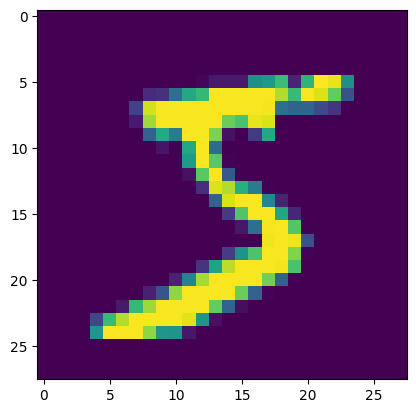

In [4]:
plt.imshow(X_train_base[0])


## Visualisation des données

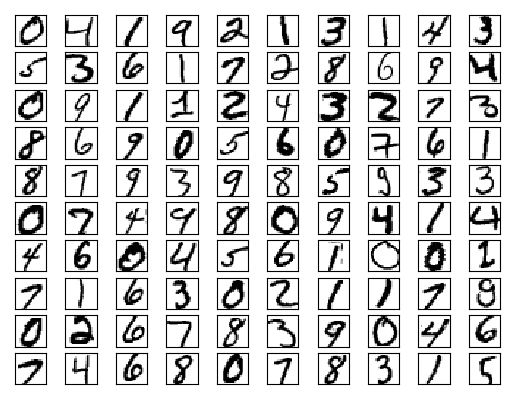

In [5]:
def plot_10_by_10_images(images):
    """ Plot 100 MNIST images in a 10 by 10 table. Note that we crop
    the images so that they appear reasonably close together.  The
    image is post-processed to give the appearance of being continued."""
    fig = plt.figure()
    images = [image[3:25, 3:25] for image in images]
    #image = np.concatenate(images, axis=1)
    for x in range(10):
        for y in range(10):
            ax = fig.add_subplot(10, 10, 10*y+x+1)
            ax.matshow(images[10*y+x+1], cmap = matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

plot_10_by_10_images(X_train_base)

## Aplatir les images
Les modèles de ML classiques ne prennet pas en compte l'aspect spatial des données. Il est nécessaire d'envoyer l'image sous forme de vecteur pour qu'elle soit reconnue à  l'entrée du modèle 

In [6]:
subset=10000 #size
nb_classes=10
X_train = X_train_base[:subset].reshape(subset, 784)
X_test = X_test_base.reshape(10000, 784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
y_train = y_train_base
y_test = y_test_base

In [7]:
print(X_train_base.shape)
print(X_train.shape)

(60000, 28, 28)
(10000, 784)


## Création d'un modèle linéaire

In [8]:
import sklearn.linear_model

model=sklearn.linear_model.LogisticRegression()
model.fit(X_train,y_train) #trou

ValueError: Found input variables with inconsistent numbers of samples: [10000, 60000]

In [ ]:
predictions=model.predict(X_test) #trou
predictions

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(predictions,y_test)
print(accuracy)

Notre baseline est de 92% de taux de bonnes predictions. 

## Test du modèle  Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=7,verbose=1,max_features=10)
model.fit(X_train,y_train) 
predictions=model.predict(X_test)
accuracy=accuracy_score(predictions,y_test) #trou
print(accuracy)

- A faire : modifier les paramètres de RandomForestClassifier pour améliorer le score. Il est au moins possible d'arriver à 97% en changeant juste les valeurs de n_estimators et max_features.
La documentation est disponible à cette adresse : 
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## Test du Support Vector Machine(svm)

- présentation du svm

In [ ]:
from sklearn import svm
model=svm.SVC(C=1.0, kernel="rbf", degree=3, max_iter=100)
model.fit(X_train,y_train) 
predictions=model.predict(X_test)
accuracy=accuracy_score(predictions,y_test)
print(accuracy)

- A faire : modifier les paramètres de svm.SVC pour améliorer le score. Il est au moins possible d'arriver à 95%.
La documentation est disponible à cette adresse : 
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

## Conclusion
- bonnes predictions pour les modèles de ML classiques
- scores toujours en dessous d'un être humain
- score qui continuera à descendre plus on augmente la taille des images

## Bonus
- visualiser les échantillons où le modèle s'est trompé de beaucoup